C:\Users\Asus\AppData\Local\Temp\ipykernel_13192\1473112095.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['time'] = actual['datetime'].dt.time.astype(str)


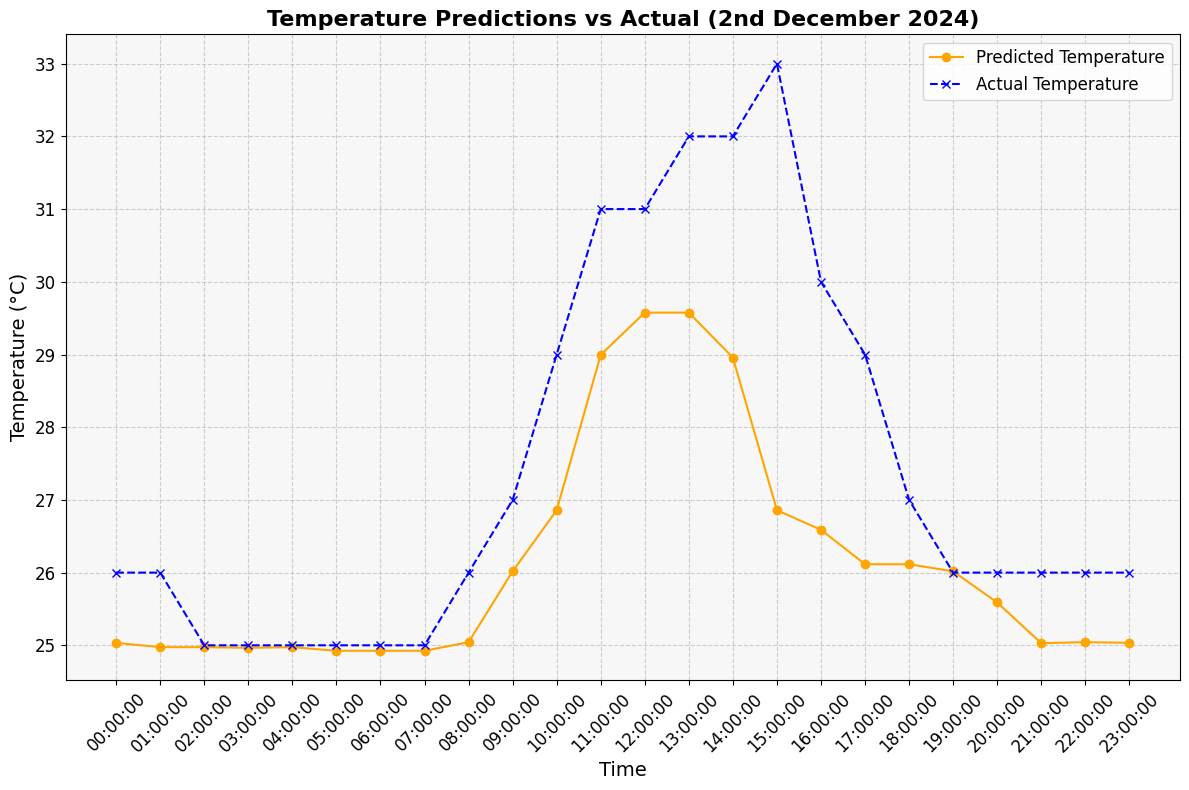

KeyError: 'humidity'

<Figure size 1200x800 with 0 Axes>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets from the specified directories
predicted_weather = pd.read_csv('States Prediction/johor_predicted_weather.csv')
cleaned_weather = pd.read_csv('States Cleaned/johor_cleaned_weather.csv')

# Ensure the 'datetime' column is in datetime format for both datasets
predicted_weather['datetime'] = pd.to_datetime(predicted_weather['datetime'])
cleaned_weather['datetime'] = pd.to_datetime(cleaned_weather['datetime'])

# Filter data for 2nd December 2024
date_filter = '2024-12-02'
predicted = predicted_weather[predicted_weather['datetime'].dt.date == pd.to_datetime(date_filter).date()]
actual = cleaned_weather[cleaned_weather['datetime'].dt.date == pd.to_datetime(date_filter).date()]

# Extract time from datetime for better visualization
predicted['time'] = predicted['datetime'].dt.time.astype(str)
actual['time'] = actual['datetime'].dt.time.astype(str)

# Define variables to plot
variables = ['temp', 'humidity', 'dew', 'visibility', 'windspeed']
titles = {
    'temp': 'Temperature',
    'humidity': 'Humidity',
    'dew': 'Dew Point',
    'visibility': 'Visibility',
    'windspeed': 'Wind Speed'
}
y_labels = {
    'temp': 'Temperature (°C)',
    'humidity': 'Humidity (%)',
    'dew': 'Dew Point (°C)',
    'visibility': 'Visibility (km)',
    'windspeed': 'Wind Speed (m/s)'
}

# Create separate plots for each variable
for var in variables:
    plt.figure(figsize=(12, 8))
    plt.plot(predicted['time'], predicted[var], label=f'Predicted {titles[var]}', marker='o', linestyle='-', color='orange')
    plt.plot(actual['time'], actual[var], label=f'Actual {titles[var]}', marker='x', linestyle='--', color='blue')
    plt.title(f'{titles[var]} Predictions vs Actual (2nd December 2024)', fontsize=16, fontweight='bold')
    plt.xlabel('Time', fontsize=14)
    plt.ylabel(y_labels[var], fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.gca().set_facecolor('#f7f7f7')
    plt.tight_layout()
    plt.show()
